In [1]:
import os
import random
import random
import imageio
# import skimage
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ModelCheckpoint
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Using TensorFlow backend.


## Получим пусть ко всем файлам трейна

In [2]:
file_dirs = []
for root, dirs, files in os.walk(r"MARKUPALL\\vip\\augmented", topdown=False):
    for name in files:
        file_dirs.append(os.path.join(root, name))

file_dirs[0].split('\\')[-2]

## Сформируем трейн датасет

df_x_train = []
df_y_train = []

random.shuffle(file_dirs)
for file in file_dirs:
    f = cv2.imread(file)
    df_x_train.append(f)
    if file.split('\\')[-2] == 'free':
        df_y_train.append(0)
    else:
        df_y_train.append(1)


sum(df_y_train)

len(df_x_train)

## Получим пусть ко всем файлам теста

file_dirs = []
for root, dirs, files in os.walk(r"MARKUPALL\\vip\\test", topdown=False):
    for name in files:
        file_dirs.append(os.path.join(root, name))
             

## Сформируем тест датасет

df_x_test = []
df_y_test = []

random.shuffle(file_dirs)
for file in file_dirs:
    f = imageio.imread(file)
    df_x_test.append(f)
    if file.split('\\')[-2] == 'free':
        df_y_test.append(0)
    else:
        df_y_test.append(1)

In [3]:
file_dirs = []
for root, dirs, files in os.walk(r"MARKUPALL\\vip\\augmented", topdown=False):
    for name in files:
        file_dirs.append(os.path.join(root, name))



## Сформируем трейн датасет

df_x_train = []
df_y_train = []

random.shuffle(file_dirs)
for file in file_dirs:
    f = imageio.imread(file)
    df_x_train.append(f)
    df_x_train.append(f)
    if file.split('\\')[-2] == 'free':
        df_y_train.append(0)
        df_y_train.append(0)
    else:
        df_y_train.append(1)
        df_y_train.append(1)


# sum(df_y_train)

# len(df_x_train)



In [5]:
len(df_x_train)

3616

In [6]:
## Получим пусть ко всем файлам теста

file_dirs = []
for root, dirs, files in os.walk(r"MARKUPALL\\vip\\test", topdown=False):
    for name in files:
        file_dirs.append(os.path.join(root, name))
             

## Сформируем тест датасет

df_x_test = []
df_y_test = []

random.shuffle(file_dirs)
for file in file_dirs:
    f = imageio.imread(file)
    df_x_test.append(f)
    df_x_test.append(f)
    if file.split('\\')[-2] == 'free':
        df_y_test.append(0)
        df_y_test.append(0)
    else:
        df_y_test.append(1)
        df_y_test.append(1)

In [7]:
len(df_y_train)



3616

In [8]:
len(df_x_train)

3616

In [9]:
len(df_x_test)

270

In [10]:
len(df_y_test)

270

In [10]:
df_x_test[0].shape

(76, 86, 3)

In [92]:
df_x_train

[Array([[[ 15,  15,  15],
         [ 15,  15,  15],
         [ 15,  15,  15],
         ...,
         [ 17,  17,  17],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        [[ 13,  13,  13],
         [ 15,  15,  15],
         [ 15,  15,  15],
         ...,
         [ 17,  17,  17],
         [ 15,  15,  15],
         [ 13,  13,  13]],
 
        [[ 15,  15,  15],
         [ 15,  15,  15],
         [ 15,  15,  15],
         ...,
         [ 18,  18,  18],
         [ 17,  17,  17],
         [ 15,  15,  15]],
 
        ...,
 
        [[ 83,  83,  83],
         [ 93,  93,  93],
         [104, 104, 104],
         ...,
         [ 24,  24,  24],
         [ 18,  18,  18],
         [ 10,  10,  10]],
 
        [[ 79,  79,  79],
         [ 91,  91,  91],
         [104, 104, 104],
         ...,
         [ 27,  27,  27],
         [ 23,  23,  23],
         [ 17,  17,  17]],
 
        [[ 69,  69,  69],
         [ 82,  82,  82],
         [ 94,  94,  94],
         ...,
         [ 31,  31,  31],
  

In [11]:
np.save("npydfs\\df_x_vip_train10", df_x_train)
np.save("npydfs\\df_y_vip_train10", df_y_train)

np.save("npydfs\\df_x_vip_test10", df_x_test)
np.save("npydfs\\df_y_vip_test10", df_y_test)

## Получим train/test выборки

In [92]:
# X_train, X_test, y_train, y_test = train_test_split(np.array(df_x), np.array(df_y), test_size=0.3, random_state=42, stratify=df_y)


X_train, X_test, y_train, y_test = np.array(df_x_train), np.array(df_x_test), np.array(df_y_train), np.array(df_y_test)

## Подготовка данных, и построение модели

In [93]:
X_train = X_train/255
X_test = X_test/255

In [94]:
X_train.shape

(1152, 75, 57, 3)

In [95]:
batch_size = 64
epochs = 50
img_rows, img_cols = 75, 57
input_shape = (img_rows, img_cols, 3)
kernel_size = (5,5)

In [96]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(10, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 71, 53, 10)        760       
_________________________________________________________________
batch_normalization_19 (Batc (None, 71, 53, 10)        40        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 35, 26, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 31, 22, 20)        5020      
_________________________________________________________________
batch_normalization_20 (Batc (None, 31, 22, 20)        80        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 11, 20)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 7, 30)         15030     
__________

In [97]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adadelta(lr=0.03),
              metrics=['accuracy'])


In [98]:
filepath = "saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks_list,
          validation_data=(X_test, y_test))

Train on 1152 samples, validate on 505 samples
Epoch 1/50
1152/1152 [==============================] - 12s 11ms/step - loss: 0.6633 - acc: 0.5842 - val_loss: 0.5900 - val_acc: 0.7109

Epoch 00001: val_acc improved from -inf to 0.71089, saving model to saved-model-01-0.71.hdf5
Epoch 2/50
1152/1152 [==============================] - 10s 9ms/step - loss: 0.5714 - acc: 0.6910 - val_loss: 0.5498 - val_acc: 0.7564

Epoch 00002: val_acc improved from 0.71089 to 0.75644, saving model to saved-model-02-0.76.hdf5
Epoch 3/50
1152/1152 [==============================] - 10s 9ms/step - loss: 0.4941 - acc: 0.7873 - val_loss: 0.5117 - val_acc: 0.7683

Epoch 00003: val_acc improved from 0.75644 to 0.76832, saving model to saved-model-03-0.77.hdf5
Epoch 4/50
1152/1152 [==============================] - 10s 9ms/step - loss: 0.4228 - acc: 0.8559 - val_loss: 0.4763 - val_acc: 0.7723

Epoch 00004: val_acc improved from 0.76832 to 0.77228, saving model to saved-model-04-0.77.hdf5
Epoch 5/50
1152/1152 [=====

KeyboardInterrupt: 

In [126]:
# model.save(r'planethallphotos\first_model.h5')

In [13]:
from keras.models import load_model
model_usual = load_model('best_usual.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [111]:
df = pd.DataFrame(model_usual.predict_classes(X_test))

In [108]:
# df['images'] = df_x_test

In [124]:
df.iloc[3].values[0]

0

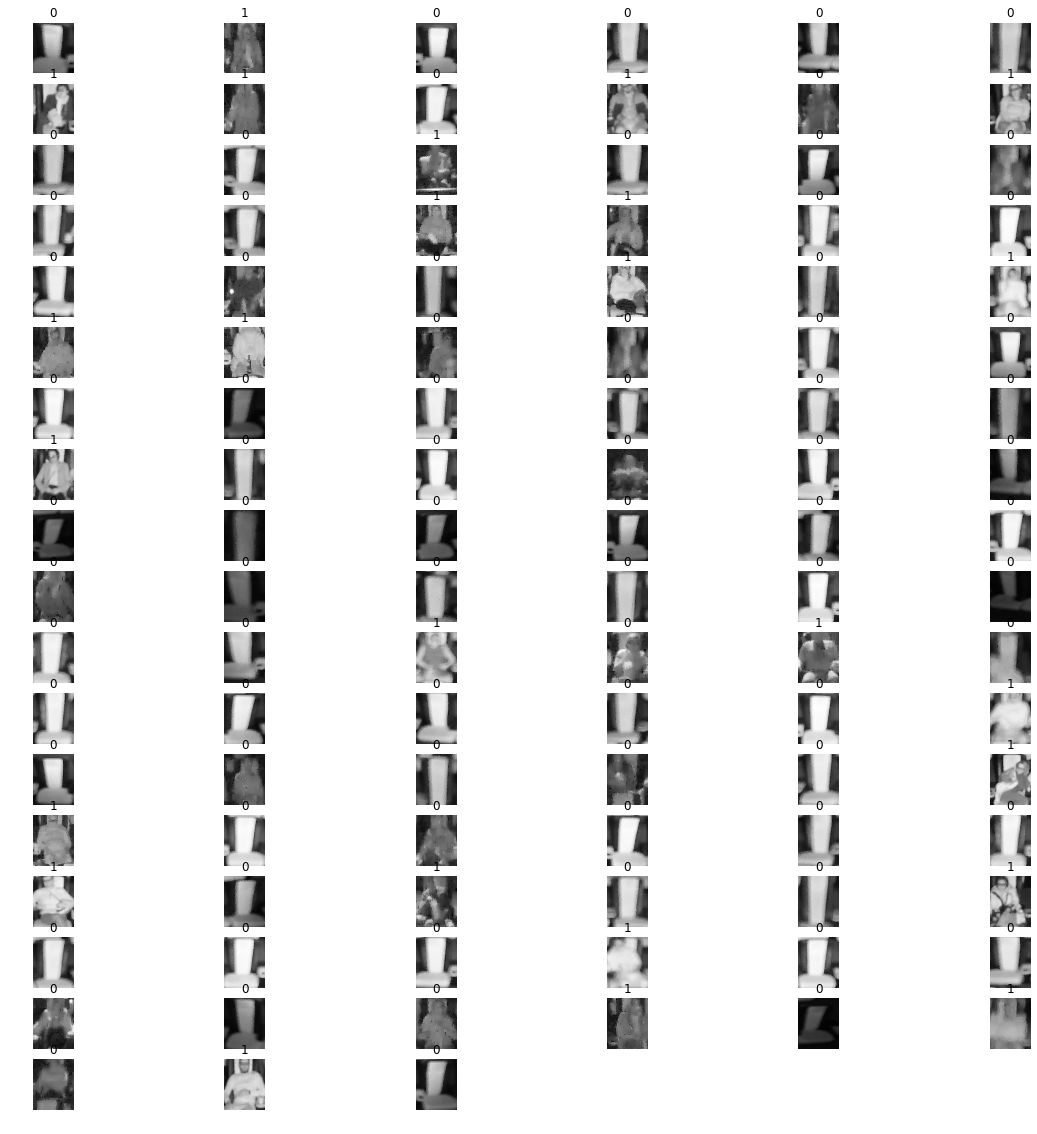

In [125]:
rows = 18
plt.figure(figsize=(20,20))
for num, x in enumerate(df_x_test):
    img = x
    plt.subplot(rows,6,num+1)
    plt.title(df.iloc[num].values[0])
    plt.axis('off')
    plt.imshow(img)

## Метод Predict

In [135]:
from keras.models import load_model
def predict_hall(path):   
    model = load_model(r'planethallphotos\first_model.h5')
    
    file_dirs = []
    for root, dirs, files in os.walk(path, topdown=False):
        for name in files:
            file_dirs.append(os.path.join(root, name))
            
            
    X = []
    y = []


    for file in file_dirs:
        f = imageio.imread(file)
        X.append(f)

            
    X = np.array(X)
    y = np.array(y)
    X = X/255
        
    df = pd.DataFrame(model.predict_classes(X))
    
    rows = 20
    plt.figure(figsize=(28,28))
    for num, x in enumerate(X):
        img = x
        plt.subplot(rows,6,num+1)
        plt.title(df.iloc[num].values[0])
        plt.axis('off')
        plt.imshow(img)
    
#     return df

Wall time: 6.97 s


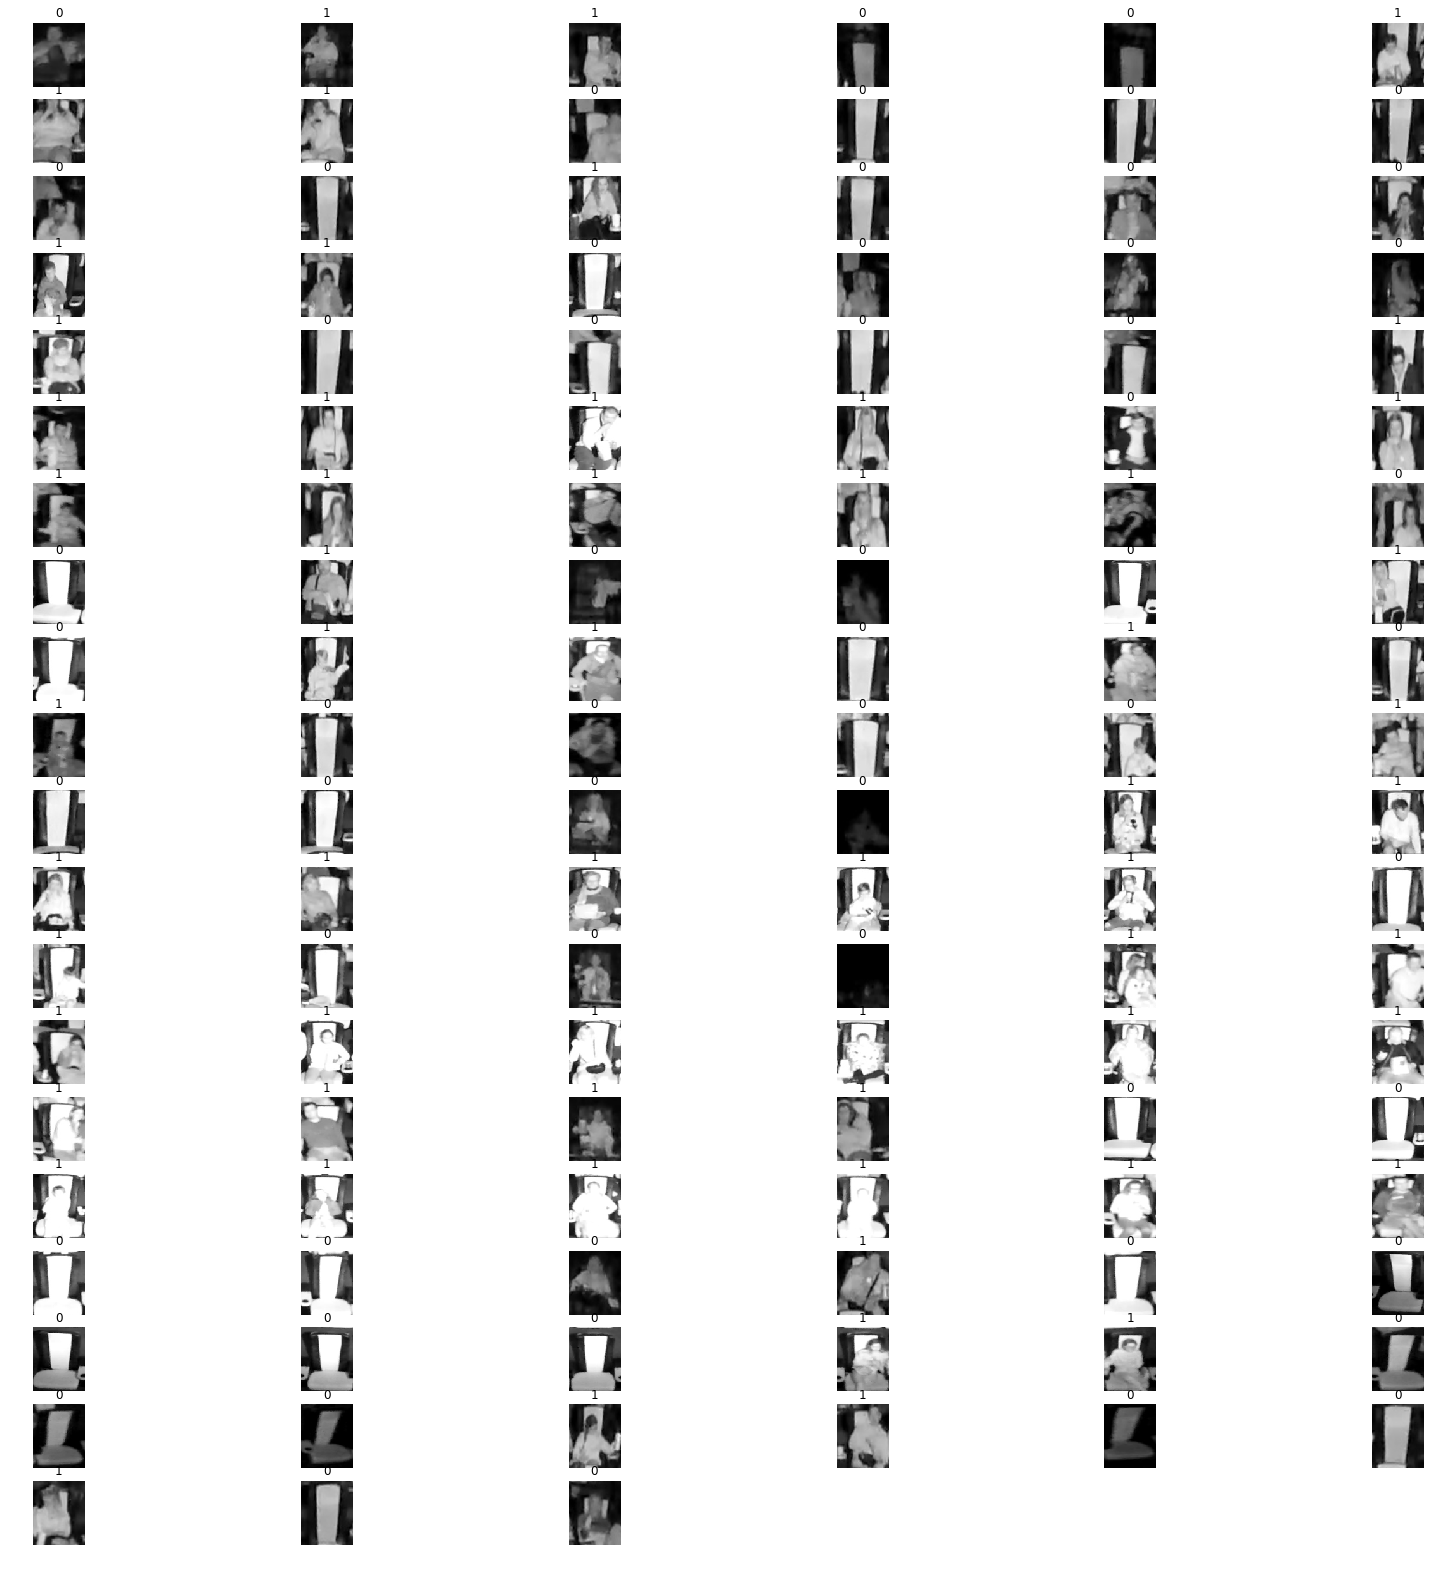

In [136]:
%%time
predict_hall(r"planethallphotos\estimate_firstmodel_on2ndhall")